In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cv2.__version__

'4.5.1'

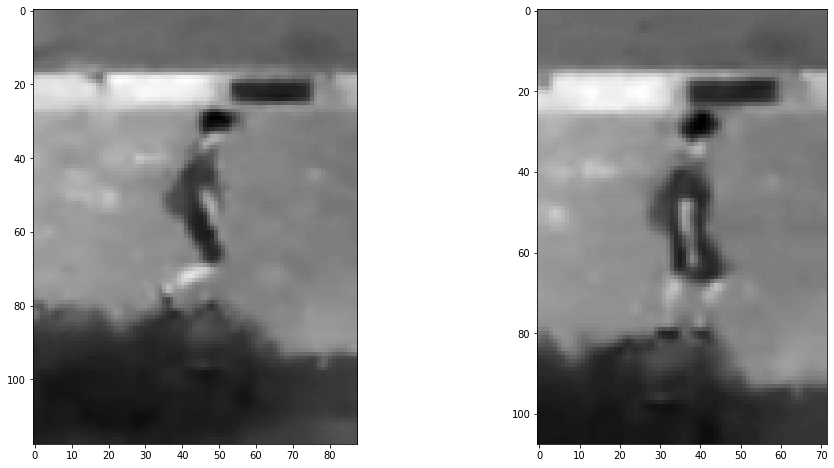

In [3]:
# read images ,you can compare any image in the images foloder
img1 = cv2.imread('images/id_001.png')  
img2 = cv2.imread('images/id_001_1.png') 
img1 = cv2.pyrUp(img1)
img2 = cv2.pyrUp(img2)

#img1 = cv2.resize(img1, (img1.shape[0]*5, img1.shape[1]*5))
#img2 = cv2.resize(img2, (img2.shape[0]*5, img2.shape[1]*5))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

In [ ]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize = (10,10))
plt.imshow(img3)
plt.show()